In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import sklearn
from scipy import io

def normalize(data):
    normal = np.zeros(data.shape)
    mean = np.mean(data)
    sd = np.std(data)
    for i in range(data.shape[0]):
        x = data[i, :]
        normal[i, :] = (x - mean) / sd
    return normal

def validation_set(data, percent):
    perm = np.random.permutation(data['X'].shape[0])
    shuffled_training, shuffled_labels = data['X'][perm], data['y'][perm]
    shuffled_training = normalize(shuffled_training)
    label_ind = int(shuffled_labels.size * percent)
    validation_data = shuffled_training[:label_ind]
    validation_labels = shuffled_labels[:label_ind]
    training_data = shuffled_training[label_ind:]
    training_labels = shuffled_labels[label_ind:]
    return validation_data, validation_labels, training_data, training_labels

In [2]:
wine = io.loadmat("Downloads/cs189_sp20_hw4/cs189_sp20_hw4/data/data.mat")

In [3]:
wine

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Feb 25 11:34:45 2020',
 '__version__': '1.0',
 '__globals__': [],
 'y': array([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]),
 'X': array([[ 5.8  ,  0.555,  0.26 , ...,  0.46 ,  9.1  ,  0.5  ],
        [ 6.3  ,  0.36 ,  0.19 , ...,  0.52 , 12.7  ,  0.6  ],
        [ 6.4  ,  0.21 ,  0.5  , ...,  0.43 ,  8.8  ,  0.5  ],
        ...,
        [ 7.3  ,  0.2  ,  0.37 , ...,  0.49 , 10.9  ,  0.6  ],
        [ 8.5  ,  0.25 ,  0.27 , ...,  0.33 , 12.   ,  0.6  ],
        [ 6.6  ,  0.36 ,  0.21 , ...,  0.41 ,  9.9  ,  0.6  ]]),
 'X_test': array([[ 7.1 ,  0.85,  0.49, ...,  0.36, 10.7 ,  0.5 ],
        [ 7.3 ,  0.32,  0.23, ...,  0.46,  8.7 ,  0.5 ],
        [ 6.2 ,  0.55,  0.45, ...,  0.5 ,  9.3 ,  0.6 ],
        ...,
        [10.2 ,  0.34,  0.48, ...,  0.69, 12.1 ,  0.7 ],
        [ 7.1 ,  0.12,  0.3 , ...,  0.52, 11.9 ,  0.7 ],
        [13.  ,  0.32,  0.65, ...,  0.61, 10.6 ,  0.5 

In [458]:
x_val, y_val, x_train, y_train = validation_set(wine, 1/6)

In [7]:
def sigmoid(X, w):
    return scipy.special.expit(np.dot(X, w))

def cost(X, y, w, lamb, eps):
    return -(np.sum(np.dot(y.transpose(), np.log(sigmoid(X, w) + eps)) + \
                    np.dot(np.ones(y.transpose().shape) - y.transpose(), np.log(np.ones(sigmoid(x_train, w).shape) - \
                    sigmoid(X, w) + eps)) + lamb*w.transpose())) / X.shape[0]

def gradient(X, y, w, lamb):
    return 2*lamb*w - np.dot(X.transpose(), y - sigmoid(X, w))

def stoc_gradient(X, y, w, lamb, i):
    shaped = X[i % 5000].transpose().reshape((12, 1))
    shaped2 = np.dot(shaped, y[i % 5000] - sigmoid(X[i % 5000], w)).reshape((12, 1))
    return 2*lamb*w - shaped2

def predict(X, w):
    predictions = sigmoid(X, w)
    preds = []
    for pred in predictions:
        preds.append(int(np.round(pred)))
    return preds

def BGD(X, y, w, lamb, eps):
    iters = 10000
    costs = []
    for i in range(iters):
        g = gradient(X, y, w, lamb)
        w = w - eps*g
        costs.append(cost(X, y, w, lamb, eps))
    return costs, w

def SGD(X, y, w, lamb, eps):
    iters = 100000
    costs = []
    for i in range(iters):
        g = stoc_gradient(X, y, w, lamb, i)
        w = w - eps*g
        costs.append(cost(X, y, w, lamb, eps))
    return costs, w

def SGD_step(X, y, w, lamb, alph):
    iters = 100000
    costs = []
    for i in range(iters):
        eps = alph / (i + 1)
        g = stoc_gradient(X, y, w, lamb, i)
        w = w - eps*g
        costs.append(cost(X, y, w, lamb, eps))
    return costs, w

In [671]:
#initialize w
w = np.random.randn(12, 1)
w

array([[-0.03868783],
       [ 0.2137965 ],
       [-0.03373638],
       [-0.08228204],
       [ 0.5299509 ],
       [-0.4965847 ],
       [-0.56431867],
       [-0.13671791],
       [-0.37002125],
       [-0.70790824],
       [ 0.12933576],
       [-0.14297457]])

In [460]:
#compute costs for BGD and the best w vector
costs, best_w = BGD(x_train, y_train, w, .001, .001)

In [461]:
costs, best_w

([5.782668071154625,
  9.87230565831852,
  5.6081379530228705,
  2.917457336043226,
  2.8858862629981905,
  2.883096693152594,
  2.8508264151654017,
  2.8892128698384107,
  2.7965533058601992,
  2.819350450232651,
  2.7315603762307648,
  2.727823351872177,
  2.678030274064896,
  2.6612715186939453,
  2.637625489503147,
  2.618158494332829,
  2.6082089150120202,
  2.591096667949093,
  2.5872632926918024,
  2.574040626446581,
  2.5724040508967967,
  2.56280209996452,
  2.5616229048955703,
  2.5547628904761965,
  2.5534359884594693,
  2.548449217701216,
  2.5468755520377697,
  2.5431097636365827,
  2.541365829342622,
  2.538387488054988,
  2.5365772695780184,
  2.5341137452611098,
  2.532317437152025,
  2.530200816014722,
  2.5284667834697125,
  2.5265938580381784,
  2.5249454035854493,
  2.52325204855873,
  2.5216964614811137,
  2.520141898461688,
  2.518677602707718,
  2.517234950620061,
  2.515856140019208,
  2.514506837188678,
  2.513206137312592,
  2.5119366935636163,
  2.51070654178

In [463]:
kaggle = predict(x_test, best_w)
kaggle = np.asarray(kaggle)


In [674]:
correct = 0
preds = predict(x_val, best_w)
for i in range(len(preds)):
    if preds[i] == y_val[i]:
        correct += 1
correct

945

In [675]:
#validation accuracy rate
correct / 1000

0.945

Text(0.5, 1.0, 'Graph of Cost and Iterations of BGD')

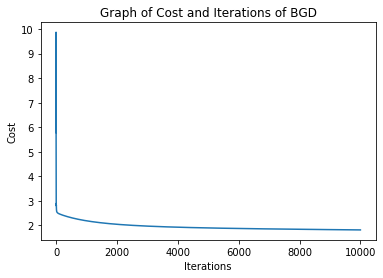

In [684]:
#plot graph of cost and iterations
BGD_iter = np.arange(10000)
plt.plot(BGD_iter, costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Graph of Cost and Iterations of BGD")

For BGD I used lambda = .001 and epsilon = .001

In [477]:
from save_csv import results_to_csv

#kaggle submission
kaggle = predict(x_test, best_w)
kaggle = np.asarray(kaggle)
results_to_csv(kaggle)

**For my Kaggle submission, I just used the batch gradient descent algorithm for 3.2. My username is esjayy and I got an accuracy of 0.92957.**

In [624]:
stoc_costs, stoc_best_w = SGD(x_train, y_train, w, .001, .001)
stoc_costs

[5.619539147505853,
 5.619564709485267,
 5.613894042525547,
 5.613908190673485,
 5.614091496273132,
 5.61410111999785,
 5.614192420742592,
 5.61267802307498,
 5.612694152566772,
 5.61269034554398,
 5.612756060073203,
 5.608986719499713,
 5.605955615376794,
 5.606215296382994,
 5.606257530138679,
 5.606342069719133,
 5.606440513516923,
 5.606445658597205,
 5.606621531492275,
 5.606630243366908,
 5.606696438751368,
 5.606695769488974,
 5.606760192422665,
 5.606764612144317,
 5.605455759455587,
 5.598484134174204,
 5.594377810527631,
 5.5921687686171415,
 5.592394768847869,
 5.591335843514091,
 5.591576568400417,
 5.588024866572022,
 5.588266662887984,
 5.5883802729360035,
 5.588416675614916,
 5.588499572363502,
 5.588511178823699,
 5.588854886793961,
 5.588902878071529,
 5.588907442332948,
 5.589109690751838,
 5.589112400829374,
 5.586139210504775,
 5.586136104050578,
 5.586430114547003,
 5.58679959526442,
 5.586812625221592,
 5.586880732026367,
 5.586935569645886,
 5.587214619734962,
 5

In [679]:
correct = 0
stoc_preds = predict(x_val, stoc_best_w)
for i in range(len(stoc_preds)):
    if stoc_preds[i] == y_val[i]:
        correct += 1
correct

932

In [680]:
#stochastic val accuracy
correct / 1000

0.932

In [581]:
stoc_best_w

array([[-0.68669886],
       [-1.81765104],
       [-1.20268959],
       [-1.09674151],
       [-0.4029175 ],
       [-0.67977579],
       [-1.80672635],
       [ 0.01836491],
       [ 0.42098236],
       [-1.82237311],
       [-1.47981822],
       [-0.39706423]])

Text(0.5, 1.0, 'Graph of Cost and Iterations of SDG')

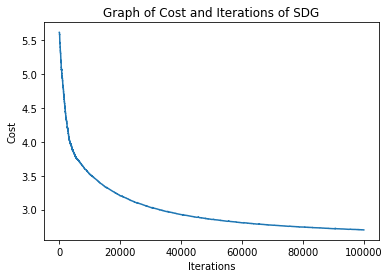

In [683]:
SGD_iter = np.arange(100000)
plt.plot(SGD_iter, stoc_costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Graph of Cost and Iterations of SGD")

For SGD I used the same lambda and epsilon as BGD, so 0.001. My BGD converged noticeably faster than my SGD algorithm. BGD also had a very steep initial drop, whereas SGD is a bit more gradual.

In [665]:
stoc_step_costs, stoc_step_best_w = SGD_step(x_train, y_train, w, .001, 100)
stoc_step_costs

[-55.29151689034698,
 -47.133824472950806,
 -42.381936833049956,
 -39.02889470627422,
 -36.44936653334085,
 -34.35877230434992,
 -32.60531627810351,
 -31.098396490777034,
 -29.779578383535682,
 -28.608968039063615,
 -27.55811492078891,
 -26.6338292223804,
 -25.79096992434819,
 -24.99599967492283,
 -24.26158792835183,
 -23.57981998230478,
 -22.944224351378214,
 -22.349442305542237,
 -21.790986878129385,
 -21.265063763469325,
 -20.768435960151272,
 -20.298319933597533,
 -19.852304881400446,
 -19.428289195539897,
 -19.024429905211225,
 -18.698461066621938,
 -18.340166915549016,
 -17.990012709398233,
 -17.654504344603627,
 -17.332613505456287,
 -17.023413840547637,
 -16.7262591451634,
 -16.440012927103727,
 -16.164170446232433,
 -15.898101706878839,
 -15.641230542805957,
 -15.393028699712612,
 -15.153010707619547,
 -14.920729419963388,
 -14.695772118062122,
 -14.477757097140117,
 -14.266330664244434,
 -14.061165469890522,
 -13.861954263626115,
 -13.668413636825205,
 -13.480278309508675,
 -

Text(0.5, 1.0, 'Graph of Cost and Iterations of SGD with Alternating Step Size')

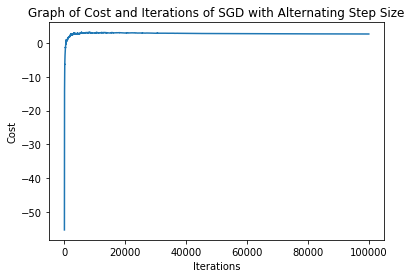

In [682]:
SGD_iter = np.arange(100000)
plt.plot(SGD_iter, stoc_step_costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Graph of Cost and Iterations of SGD with Alternating Step Size")

In [685]:
correct = 0
stoc_step_preds = predict(x_val, stoc_step_best_w)
for i in range(len(stoc_step_preds)):
    if stoc_step_preds[i] == y_val[i]:
        correct += 1
correct

933

In [686]:
#accuracy for sdg with decreasing step
correct / 1000

0.933